In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder #LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. 
#If a label repeats it assigns the same value to as assigned earlier.
# The categorical values have been converted into numeric values. That's all label encoding is about.

from keras.models import Model # for creating model in deep learning
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding # LSTM is kind of RNN (Recurring Nural Network)

from keras.optimizers import RMSprop #It uses a moving average of squared gradients to normalize the gradient itself. 
#That has an effect of balancing the step size — decrease the step for large gradient to avoid exploding, 
#and increase the step for small gradient to avoid vanishing.

from keras.preprocessing.text import Tokenizer

from keras.preprocessing import sequence # Recurrent Neural Networks (RNN) are a type of statistical model designed to handle sequential data. 
#The model reads a sequence one symbol at a time. 
#Each symbol is processed based on information collected from the previous symbols.
from keras.utils import to_categorical

from keras.callbacks import EarlyStopping #Keras supports the early stopping of training via a callback called EarlyStopping. 
#This callback allows you to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process. 
#The EarlyStopping callback is configured when instantiated via arguments.
%matplotlib inline

In [63]:
from google.colab import files # uploading files from local drive to colab platform

uploaded=files.upload()

Saving spam.csv to spam (1).csv


In [64]:
import io #io module provides the Python interfaces to stream handling.

df=pd.read_csv(io.BytesIO(uploaded['spam.csv']),delimiter=',',encoding='latin-1')

print(df.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [65]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [67]:
#understanding the distribut

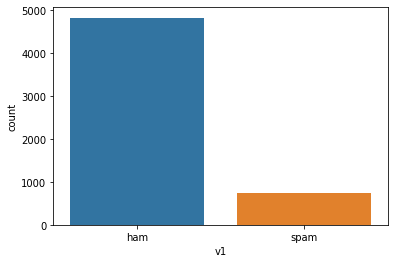

In [68]:
sns.countplot(data=df,x=df.v1)

# ham is more than spam hence not balance dataset

In [69]:
x=df.v2
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [70]:
y=df.v1
y.head()

#since its in text form need to convert into numeric form

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [71]:
le=LabelEncoder() # calling label encoder
y=le.fit_transform(y) # fiting into Encoder and transforming dataset
y

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
#ham=0, spam=1

In [73]:
y.shape 

(5572,)

In [74]:
#reshaping
y=y.reshape(-1,1) # converting into numpy data
y.shape

(5572, 1)

In [75]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [76]:
#Split into training and testing dataset

In [77]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.15)

Process Tha Data

Tokenize the data and convert the text into sequence.

add padding to ensure that all the sequence have same shape

there are many ways of taking max_len and here an arbitary length of 150 is choosen

In [78]:
# Top 1000 frequently occurring words (bag of words model and toekniezer are same thing both convert text into numbers)
max_words=1000

#Define  the sequence length , max number of words and embedding dimension
# sequence length of each sentence .if more, truncate. if less pad with zeros

max_length =150 # each sentence have maximum length of 150 

In [79]:
# Covert text into numbers via 'Tokenier'

#### Here document means "each lines in the page is document ex- if page 1 have 10 lines than we have 10 document"

#Tokenizer have fout out extra output
#1-word_count- a dictionary of words and their count
#2-word_docs- a dictionary of words and how many documents each appeared in.
#3-word_index- a dictionay of words and their uniquely assign integers
#4-document_count-an integer count of the total number of documents that were used to fit the tokeniezer

tok= Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train) #fiting training in tokenizer
tok

In [80]:
#Transform each text in texts to a sequence of integer

sequences=tok.texts_to_sequences(x_train)
sequences

[[79, 6, 607, 1, 153, 506, 563, 5, 174, 1, 133, 2, 370, 12, 14],
 [37, 18, 5, 136, 77, 23, 34, 25, 12, 5, 305, 5, 175, 17, 109, 201],
 [6, 271, 19, 507, 272, 29, 9, 90, 21],
 [244, 6, 202, 202, 15, 5, 60, 130, 324],
 [23, 583, 87, 203, 265, 15, 197, 564, 24, 83, 190, 11, 96],
 [46,
  87,
  413,
  1,
  265,
  39,
  203,
  31,
  980,
  21,
  174,
  57,
  386,
  214,
  150,
  6,
  271,
  19,
  53,
  488,
  43,
  32,
  4,
  25,
  852,
  8,
  508,
  151,
  21],
 [154,
  48,
  397,
  179,
  49,
  81,
  13,
  65,
  168,
  21,
  266,
  154,
  12,
  48,
  69,
  313,
  2,
  259,
  63,
  164,
  154,
  48,
  636,
  330,
  224,
  637],
 [117, 22, 3, 16, 10],
 [82, 1, 17, 25, 14, 90],
 [228, 24, 98, 463],
 [7, 50, 3, 35, 28, 20, 387],
 [1,
  65,
  3,
  126,
  3,
  55,
  1,
  27,
  14,
  1,
  906,
  50,
  13,
  60,
  509,
  7,
  34,
  3,
  22,
  111,
  11,
  65,
  1,
  105,
  15,
  3,
  7,
  171,
  3],
 [37, 20, 38, 565, 3, 17, 4, 698],
 [48, 566, 229, 38, 69, 2, 58, 184, 114, 31, 4, 99, 229, 63, 330

In [81]:
#since all sequence are not in equal length hence we can add pading(0 before number to fulfill all length equality)

sequences_matrix=sequence.pad_sequences(sequences,maxlen=max_length)
sequences_matrix

# now we can see all lines are in equal length by adding 0

array([[  0,   0,   0, ..., 370,  12,  14],
       [  0,   0,   0, ...,  17, 109, 201],
       [  0,   0,   0, ...,   9,  90,  21],
       ...,
       [  0,   0,   0, ...,  12,  99, 472],
       [  0,   0,   0, ...,  32, 252,  97],
       [  0,   0,   0, ..., 532, 999, 220]], dtype=int32)

## RNN

In [82]:
def RNN():
    i = Input(name='inputs',shape=[max_length])
    x = Embedding(max_words,50,input_length=max_length)(i)
##The Embedding layer is used to create word vectors for incoming words. It sits between the input and the LSTM layer, 
  #i.e. the output of the Embedding layer is the input to the LSTM layer. ... 
  #50 is output dimention.
  #max word=1000 already mentioned 



    # https://keras.io/api/layers/core_layers/embedding/
    # https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

    x = LSTM(64)(x) ##64 is 'unit':##the unit means the dimension of the inner cells in LSTM.
    x = Dense(256,name='FC1')(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1,name='out_layer')(x)
    x = Activation('sigmoid')(x) ##since we required only one output (1) hence used sigmoid
    model = Model(inputs=i,outputs=x)
    return model

In [83]:
#call the function and complete model
model=RNN()
model.summary()
model.compile(loss='binary_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                

In [84]:
#fit on training data

r=model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
            validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])



# https://keras.io/api/callbacks/early_stopping/
# https://stackoverflow.com/questions/50284898/keras-earlystopping-which-min-delta-and-patience-to-use

Epoch 1/10
30/30 [==============================] - 6s 194ms/step - loss: 0.3041 - accuracy: 0.8865 - val_loss: 0.1424 - val_accuracy: 0.9673
Epoch 2/10
30/30 [==============================] - 5s 176ms/step - loss: 0.0776 - accuracy: 0.9815 - val_loss: 0.0643 - val_accuracy: 0.9821
Epoch 3/10
30/30 [==============================] - 5s 176ms/step - loss: 0.0455 - accuracy: 0.9868 - val_loss: 0.0591 - val_accuracy: 0.9821
Epoch 4/10
30/30 [==============================] - 5s 176ms/step - loss: 0.0312 - accuracy: 0.9921 - val_loss: 0.0629 - val_accuracy: 0.9852


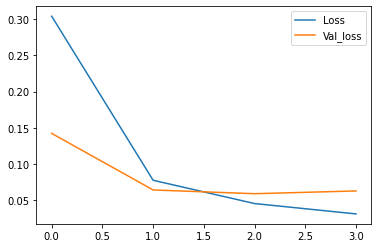

In [85]:
#plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label='Val_loss')
plt.legend()

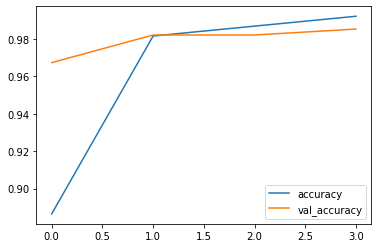

In [86]:
#plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [87]:
# Process the test set data.
test_sequences = tok.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_length)

In [88]:
# Evaluate the model on the test set.
accr = model.evaluate(test_sequences_matrix,y_test)

27/27 [==============================] - 0s 18ms/step - loss: 0.0506 - accuracy: 0.9868


In [89]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.051
  Accuracy: 0.987


In [90]:
#We have good accuracy as 98%